# Libraries

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import (
                            accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            )

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set()

## Loading the Data

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


# Step 1: Exploratory Data Analysis

## 1. Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [5]:
df.shape

(4269, 13)

In [6]:
df.columns = df.columns.str.strip()
df.columns.tolist()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

## 2. Checking the missing values

In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## 3. Visulization

### 3.1 Histogram and KDE Plots

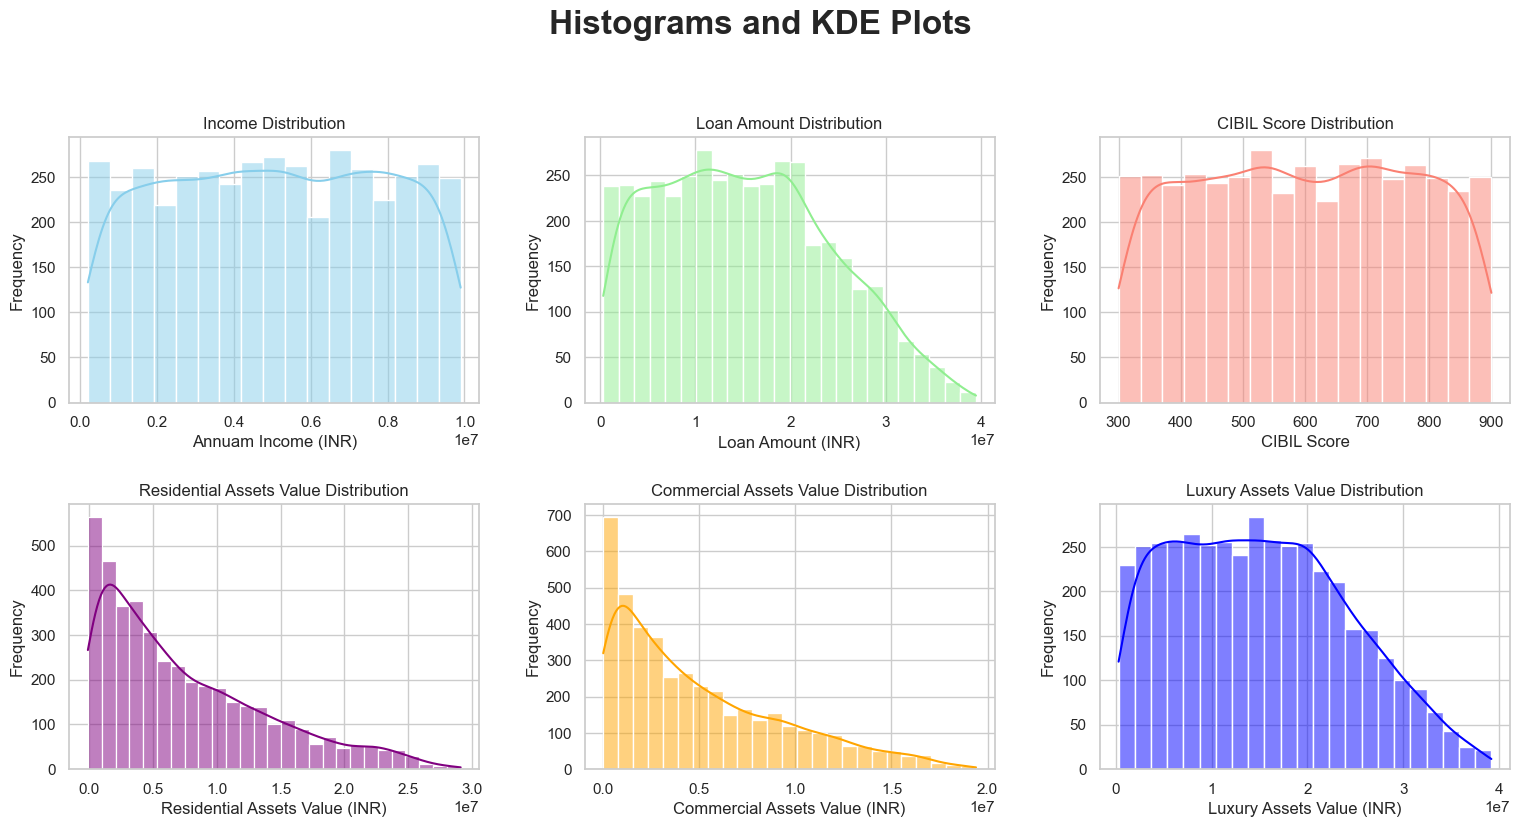

In [43]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,12))

plt.subplot(3,3,1)
sns.histplot(df['income_annum'], kde = True, color='skyblue')
plt.xlabel('Annuam Income (INR)')
plt.ylabel('Frequency')
plt.title('Income Distribution')

plt.subplot(3,3,2)
sns.histplot(df['loan_amount'], kde = True, color='lightgreen')
plt.xlabel('Loan Amount (INR)')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')

plt.subplot(3,3,3)
sns.histplot(df['cibil_score'], kde = True, color='salmon')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.title('CIBIL Score Distribution')

plt.subplot(3,3,4)
sns.histplot(df['residential_assets_value'], kde = True, label='Residential', color='purple')
plt.xlabel('Residential Assets Value (INR)')
plt.ylabel('Frequency')
plt.title('Residential Assets Value Distribution')

plt.subplot(3,3,5)
sns.histplot(df['commercial_assets_value'], kde = True, label='Commercial', color='orange')
plt.xlabel('Commercial Assets Value (INR)')
plt.ylabel('Frequency')
plt.title('Commercial Assets Value Distribution')

plt.subplot(3,3,6)
sns.histplot(df['luxury_assets_value'], kde = True, label='Luxury', color='blue')
plt.xlabel('Luxury Assets Value (INR)')
plt.ylabel('Frequency')
plt.title('Luxury Assets Value Distribution')

plt.suptitle("Histograms and KDE Plots", fontsize=24, fontweight='bold')
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.5)
plt.show()

### 3.2 Categorical Feature Analysis

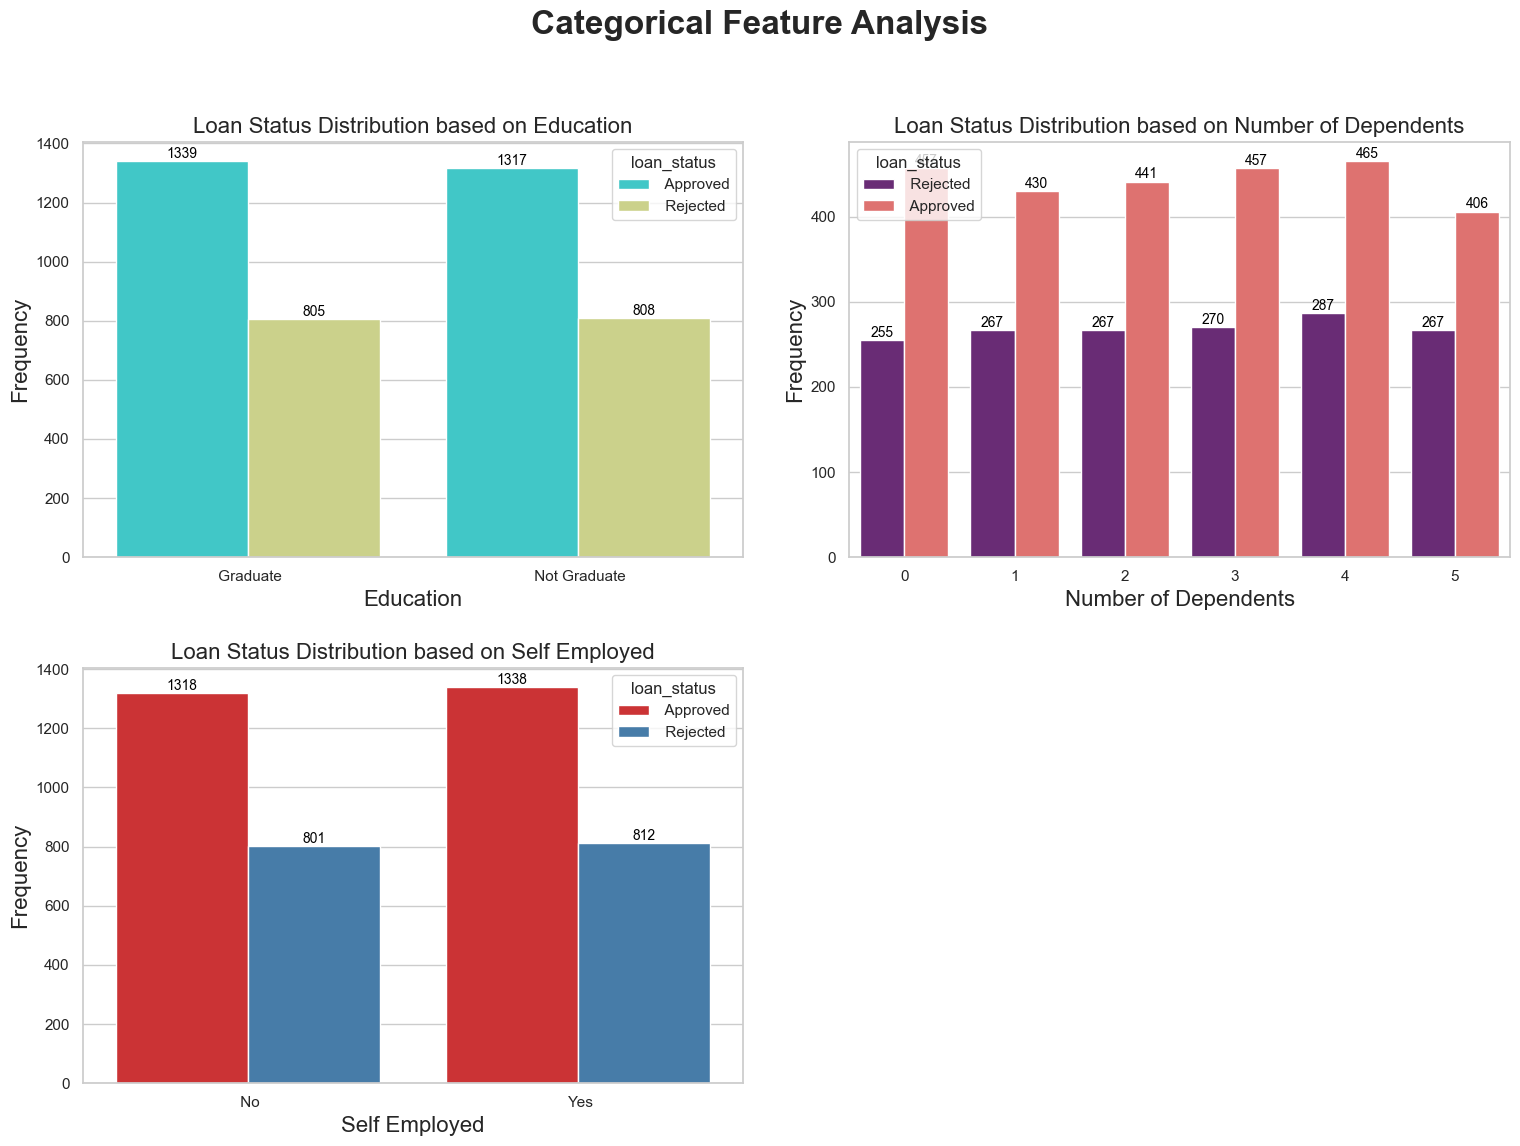

In [91]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
ax = sns.countplot(data=df, x='education', hue='loan_status', palette='rainbow')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
# ax.legend_.remove()
plt.xlabel('Education', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Loan Status Distribution based on Education', fontsize=16)

plt.subplot(2,2,2)
ax = sns.countplot(data=df, x='no_of_dependents', hue='loan_status', palette='magma')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
# ax.legend_.remove()
plt.xlabel('Number of Dependents', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Loan Status Distribution based on Number of Dependents', fontsize=16)

plt.subplot(2,2,3)
ax = sns.countplot(data=df, x='self_employed', hue='loan_status', palette='Set1')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
# ax.legend_.remove()
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Loan Status Distribution based on Self Employed', fontsize=16)

plt.suptitle('Categorical Feature Analysis', fontsize=24, fontweight='bold')
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.5)
plt.show()

## 3.3 Bivariate Analysis

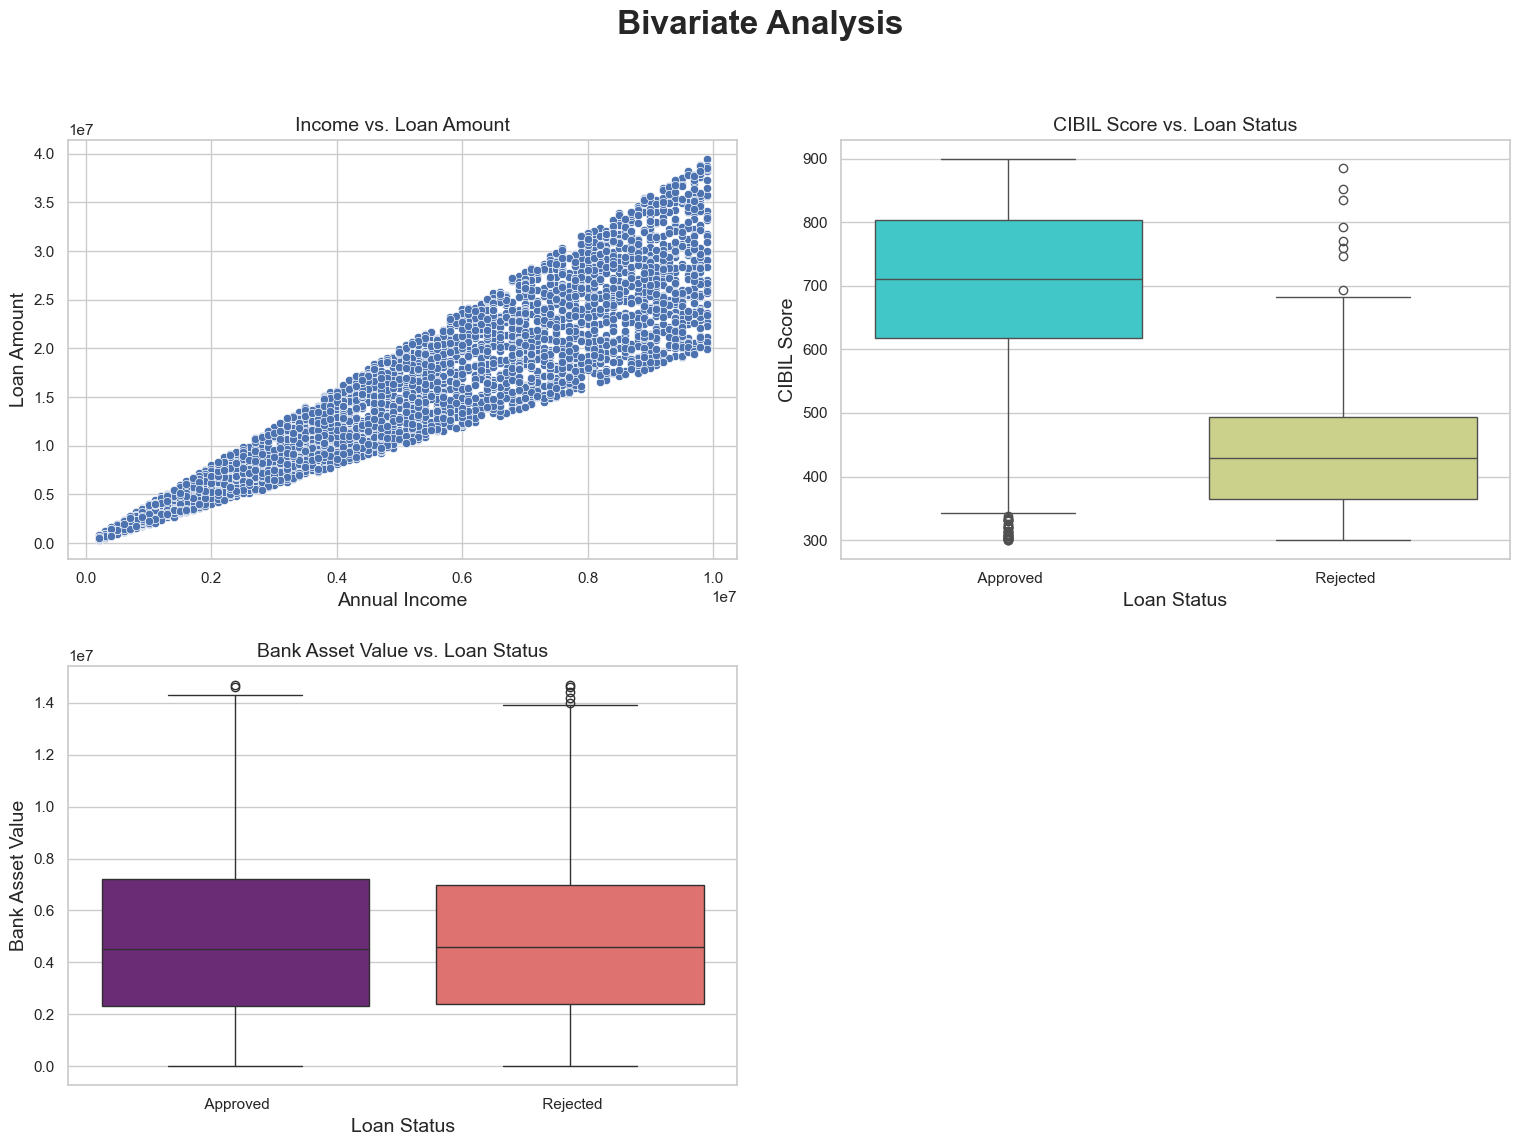

In [90]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
sns.scatterplot(data=df, x='income_annum', y='loan_amount')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.title('Income vs. Loan Amount', fontsize=14)

plt.subplot(2,2,2)
sns.boxplot(data=df, x='loan_status', y='cibil_score', hue='loan_status', palette='rainbow')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('CIBIL Score', fontsize=14)
plt.title('CIBIL Score vs. Loan Status', fontsize=14)

plt.subplot(2,2,3)
sns.boxplot(data=df, x='loan_status', y='bank_asset_value', hue='loan_status', palette='magma')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Bank Asset Value', fontsize=14)
plt.title('Bank Asset Value vs. Loan Status', fontsize=14)

plt.suptitle('Bivariate Analysis', fontsize=24, fontweight='bold')
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.5)
plt.show()

## 3.4 Total Loan Amount based on Loan Tenure

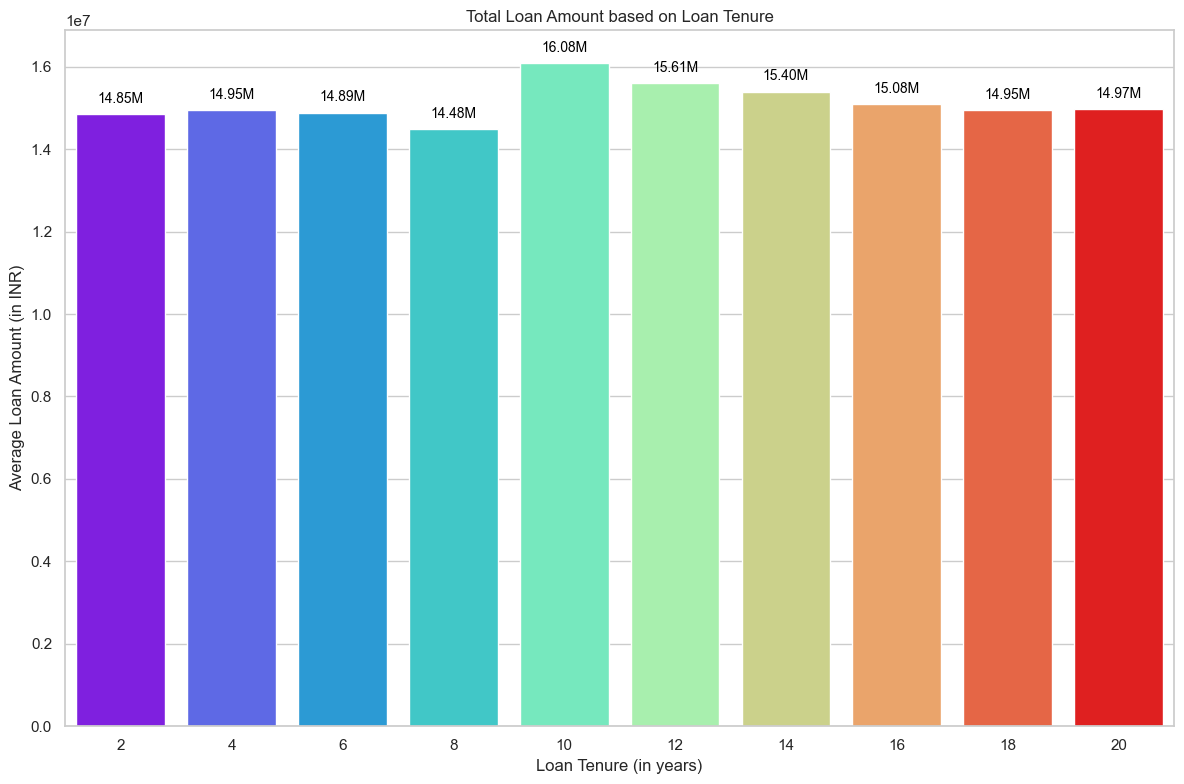

In [86]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data=df.sort_values('loan_term'), x='loan_term', y='loan_amount', estimator=np.mean, errorbar=None, hue='loan_term', palette='rainbow')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        label = f"{height/1e6:.2f}M"
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 2e5,
            label,
            va='bottom',
            ha='center',
            fontsize=10,
            color='black'     
        )
ax.legend_.remove()
plt.xlabel("Loan Tenure (in years)")
plt.ylabel("Average Loan Amount (in INR)")
plt.title("Total Loan Amount based on Loan Tenure")
plt.tight_layout(h_pad=30)
plt.show()

## 3.5 Correlation Matrix

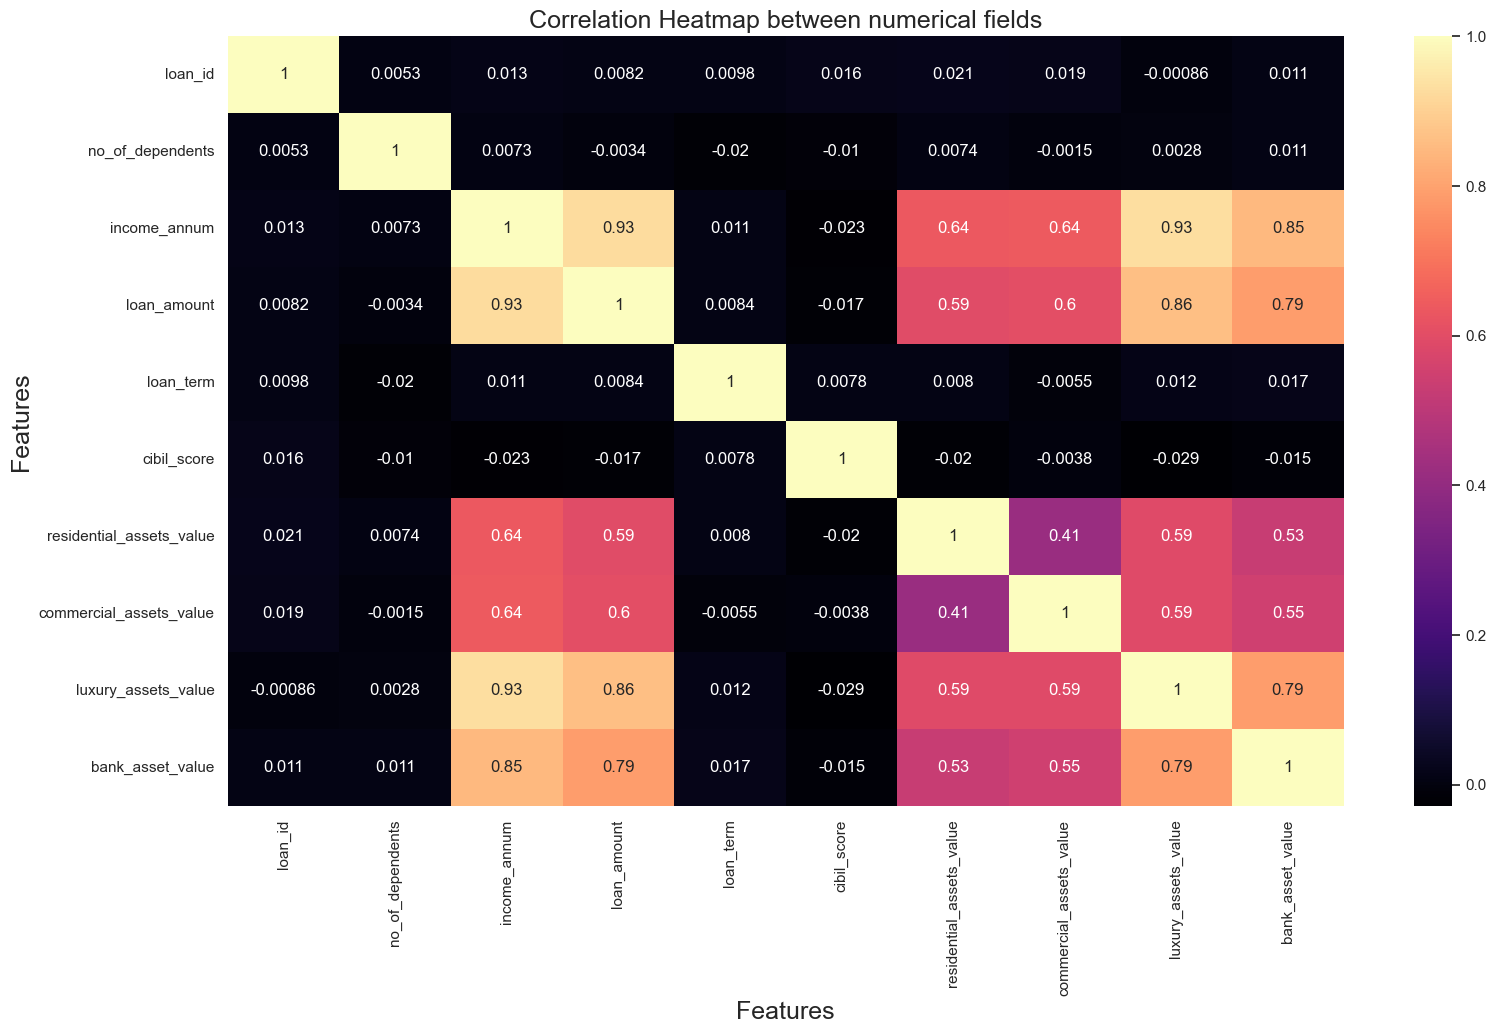

In [88]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma')
plt.xlabel('Features', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Correlation Heatmap between numerical fields", fontsize=18)
plt.show()

## 4. Categorical Columns Distribution

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(df[col].value_counts())
    print("-" * 40)

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
----------------------------------------
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
----------------------------------------
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
----------------------------------------


# Step 2: Data Preprocessing

## 1. Encode Categorical Variable

In [14]:
oe = OrdinalEncoder(categories=[[' Not Graduate', ' Graduate']])
df['education'] = oe.fit_transform(df[['education']])

oe = OrdinalEncoder(categories=[[' No', ' Yes']])
df['self_employed'] = oe.fit_transform(df[['self_employed']])

oe = OrdinalEncoder(categories=[[' Rejected', ' Approved']])
df['loan_status'] = oe.fit_transform(df[['loan_status']])

## 2. Feature - Target Split

In [15]:
df = df.drop(columns='loan_id', axis=1)  # dropping the id columns
df.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0
5,0,1.0,1.0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0.0
6,5,1.0,0.0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1.0
7,2,1.0,1.0,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0.0
8,0,1.0,1.0,800000,2200000,20,782,1300000,800000,2800000,600000,1.0
9,5,0.0,0.0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,0.0


In [16]:
X = df.drop(columns='loan_status', axis=1)
y = df['loan_status']

## 3. Feature Scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.2941017 ,  0.99555917, -1.00728821, ...,  2.877289  ,
         0.83202837,  0.93030441],
       [-1.4735476 , -1.00446064,  0.99276452, ..., -0.63192107,
        -0.69499321, -0.51593638],
       [ 0.29562125,  0.99555917, -1.00728821, ..., -0.10781827,
         1.99651964,  2.40731629],
       ...,
       [-0.2941017 , -1.00446064, -1.00728821, ...,  1.69236092,
         0.3266831 ,  0.71490685],
       [-0.88382465, -1.00446064, -1.00728821, ..., -0.97372725,
        -0.11274758,  0.25334064],
       [-0.88382465,  0.99555917, -1.00728821, ...,  1.55563845,
         2.26017804,  2.16114764]])

## 4. Train - Test Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

## Model Building

### 1. Logistic Regression

In [19]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(x_train, y_train)
pred_log = log_model.predict(x_test)

## 2. Decision Tree

In [20]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_test)

## 2. Random Forest 

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)

## Model Evaluation

In [28]:
def evaluation_model(x_test, y_pred, model_name):
    print(f"Model Name: {model_name}")
    print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
    print(f"Precision: {round(precision_score(y_test, y_pred) * 100, 2)}%")
    print(f"Recall: {round(recall_score(y_test, y_pred) * 100, 2)}%")
    print(f"F1 Score: {round(f1_score(y_test, y_pred) * 100, 2)}%\n")
    print(f"Confustion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    


evaluation_model(y_test, pred_log, "Logistic Model")
print("-" * 50)
evaluation_model(y_test, pred_dt, "Decision Tree Model")
print("-" * 50)
evaluation_model(y_test, pred_rf, "Random Forest Model")

Model Name: Logistic Model
Accuracy: 92.51%
Precision: 94.38%
Recall: 93.3%
F1 Score: 93.83%

Confustion Matrix: 
[[303  29]
 [ 35 487]]

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       332
         1.0       0.94      0.93      0.94       522

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

--------------------------------------------------
Model Name: Decision Tree Model
Accuracy: 97.42%
Precision: 97.53%
Recall: 98.28%
F1 Score: 97.9%

Confustion Matrix: 
[[319  13]
 [  9 513]]

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       332
         1.0       0.98      0.98      0.98       522

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.

# Corss Validation 

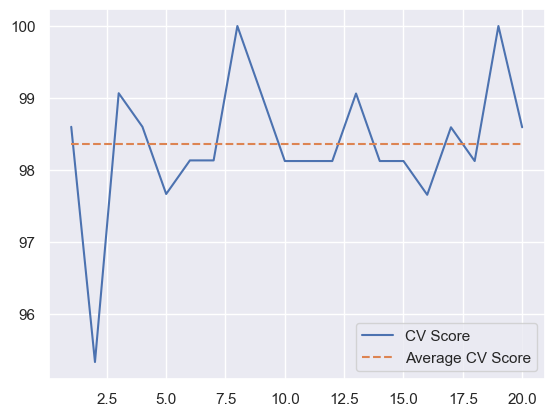

In [29]:
cv_scores = cross_val_score(rf_model, X, y, cv=20)

n_iter = np.arange(1, 21)
plt.plot(n_iter, cv_scores*100, label="CV Score")
plt.plot(
    n_iter, 
    np.full(
        shape=20,
        fill_value=np.mean(cv_scores)*100,
    ),
    linestyle = "--",
    label = 'Average CV Score'
)
plt.legend()
plt.show()

# Step 7: Predict on new Data

In [30]:
def user_input():
    no_of_dependents = int(input("Enter Number of Dependents in the Applicant: "))
    education = int(input("Enter Applicant Education (Not Graduate ➡️ 0, Graduate ➡️ 1: "))
    self_employed = int(input("Is Applicant self Employed (No ➡️ 0, Yes ➡️ 1: "))
    income_annual = int(input("What is the annual income of Applicant (e.g., for 4lakhs = 400000): "))
    loan_amount = int(input("What is the loan amount of Applicant (e.g., for 3lakhs = 300000): "))
    loan_term = int(input("What is the loan term for the loan (in years): "))
    cibil_score = int(input("Cibil Score of the Applicant: "))
    residential_assets_value = int(input("Residential Asset Value of the Applicant: "))
    commercial_assets_value = int(input("Commercial Asset Value of the Applicant: "))
    luxury_assets_value = int(input("Luxury Asset Value of the Applicant:"))
    bank_asset_value = int(input("Bank Asset Value of the Applicant: "))

    user_input_value = np.array([[no_of_dependents, education, self_employed, income_annual, loan_amount, loan_term, cibil_score, residential_assets_value, 
                        commercial_assets_value, luxury_assets_value, bank_asset_value]])
    return user_input_value
    
new_input = user_input()
new_input_scaled = scaler.transform(new_input)
pred = rf_model.predict(new_input_scaled)

KeyboardInterrupt: Interrupted by user

In [ ]:
df.head()

In [ ]:
print("Loan Approved" if pred[0] == 1 else "Loan Rejected")

In [ ]:
pred

In [32]:
y.value_counts(normalize=True)

loan_status
1.0    0.62216
0.0    0.37784
Name: proportion, dtype: float64

<Axes: xlabel='income_group', ylabel='count'>

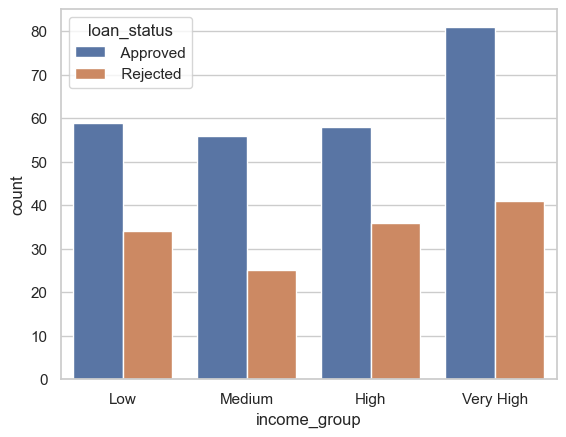

In [92]:
df['income_group'] = pd.cut(df['income_annum'], bins=[0, 300000, 500000, 700000, 1000000], labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='income_group', hue='loan_status', data=df)
